# K-Nearest Neighbors - K Vecinos Más Cercanos para Clasificación

El algoritmo K-Nearest Neighbors (KNN) es un método de aprendizaje supervisado utilizado para tareas de clasificación y regresión. Su principio básico consiste en identificar los k vecinos más cercanos a un punto de datos basado en una métrica de distancia, como la distancia euclidiana, y utilizar sus valores para predecir el resultado.

En clasificación, KNN asigna una categoría al punto nuevo considerando la mayoría de las clases de sus vecinos más cercanos. Por ejemplo, puede emplearse para identificar si un correo es spam o no, clasificar imágenes según su contenido o predecir el comportamiento de los clientes en función de sus características.

Es un algoritmo intuitivo y efectivo, especialmente en problemas donde los datos tienen relaciones locales bien definidas, aunque su desempeño puede disminuir con conjuntos de datos grandes o dimensionalidades altas.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
vehiculos_df = pd.read_csv('sample_data/vehiculos.csv')
vehiculos_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


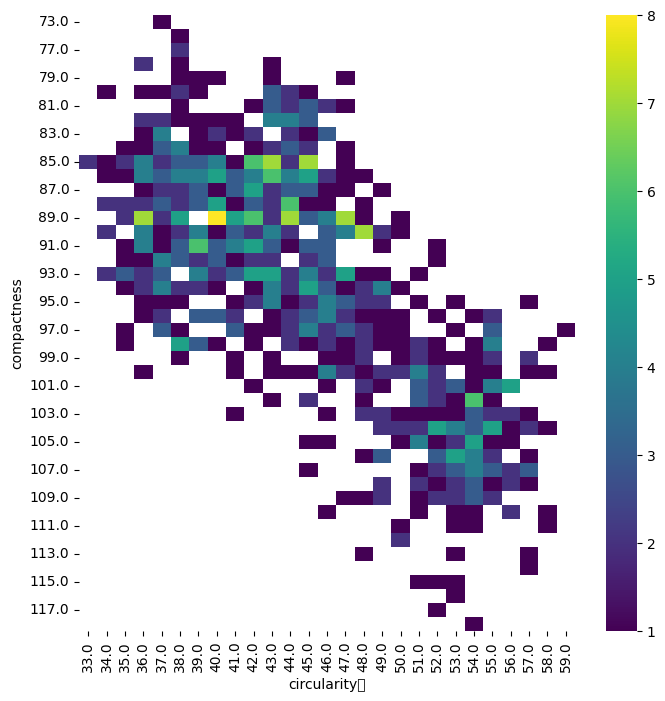

In [80]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['compactness'].value_counts()
    for x_label, grp in vehiculos_df.groupby('circularity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('circularity	')
_ = plt.ylabel('compactness')

<Axes: >

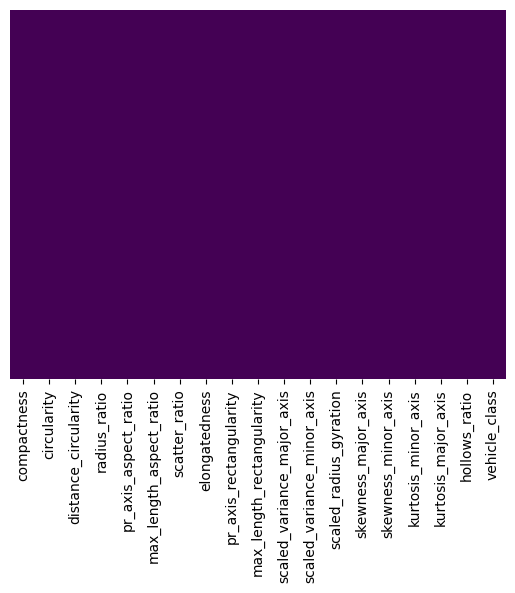

In [81]:
sns.heatmap(vehiculos_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='vehicle_class', ylabel='compactness'>

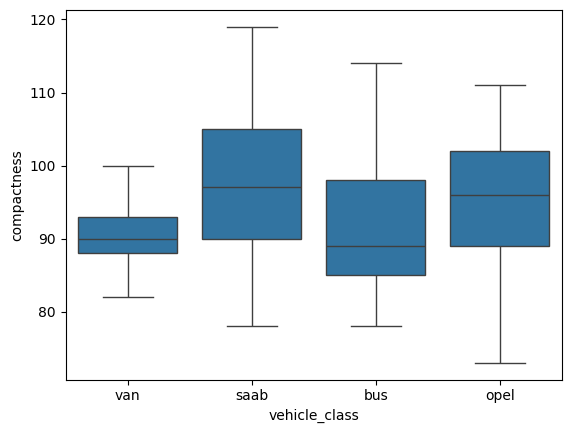

In [83]:
sns.boxplot(x='vehicle_class', y='compactness', data=vehiculos_df)

In [6]:
vehiculos_df['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [9]:
y_data = vehiculos_df['vehicle_class']
X_data = vehiculos_df.drop('vehicle_class', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 25)

In [13]:
X_test

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
456,92.0,43.0,70.0,124.0,52.0,6.0,139.0,49.0,18.0,144.0,164.0,282.0,172.0,79.0,4.0,16.0,183.0,185.0
194,92.0,37.0,86.0,167.0,60.0,7.0,158.0,42.0,20.0,131.0,181.0,373.0,144.0,68.0,9.0,21.0,190.0,196.0
18,104.0,54.0,100.0,186.0,61.0,10.0,216.0,31.0,24.0,173.0,225.0,686.0,220.0,74.0,5.0,11.0,185.0,195.0
523,90.0,43.0,81.0,231.0,97.0,46.0,150.0,45.0,19.0,149.0,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196.0
717,96.0,46.0,74.0,202.0,74.0,5.0,163.0,39.0,20.0,149.0,185.0,408.0,191.0,70.0,7.0,8.0,196.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,84.0,45.0,66.0,154.0,65.0,6.0,145.0,46.0,19.0,144.0,168.0,312.0,177.0,73.0,2.0,3.0,184.0,188.0
520,89.0,40.0,89.0,174.0,58.0,8.0,177.0,37.0,21.0,133.0,202.0,471.0,155.0,70.0,7.0,18.0,189.0,196.0
822,95.0,41.0,82.0,170.0,65.0,9.0,145.0,46.0,19.0,145.0,163.0,314.0,140.0,64.0,4.0,8.0,199.0,207.0
670,95.0,51.0,96.0,196.0,63.0,9.0,190.0,35.0,22.0,161.0,208.0,543.0,235.0,68.0,13.0,0.0,191.0,198.0


In [14]:
knn_model_n1 = KNeighborsClassifier(n_neighbors=1)
knn_model_n1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
prediccciones_model_n1 = knn_model_n1.predict(X_test)

In [16]:
print(confusion_matrix(y_test, prediccciones_model_n1))

[[34  0  2  2]
 [ 3 11 19  5]
 [ 3 19 24  1]
 [ 1  2  3 41]]


In [17]:
print(classification_report(y_test, prediccciones_model_n1))

              precision    recall  f1-score   support

         bus       0.83      0.89      0.86        38
        opel       0.34      0.29      0.31        38
        saab       0.50      0.51      0.51        47
         van       0.84      0.87      0.85        47

    accuracy                           0.65       170
   macro avg       0.63      0.64      0.63       170
weighted avg       0.63      0.65      0.64       170



In [73]:
tasa_error_models = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicciones_ni = knn.predict(X_test)
    result = {'mean': np.mean(y_test != predicciones_ni), 'model': knn, 'prediccion': predicciones_ni}
    tasa_error_models.append(result)

In [74]:
tasa_errors = [i['mean'] for i in tasa_error_models]

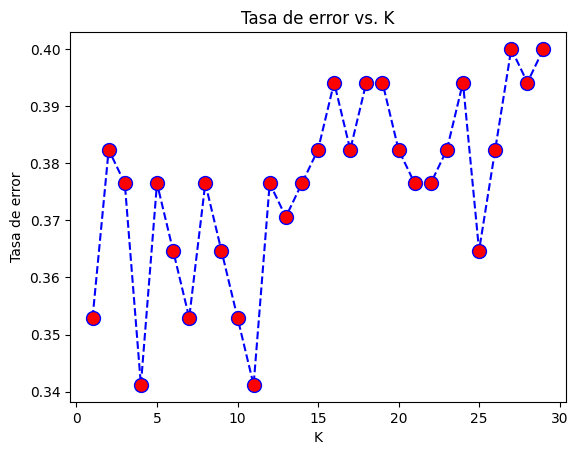

In [75]:
valores = range(1, 30)
plt.plot(valores, tasa_errors, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de error vs. K')
plt.xlabel('K')
plt.ylabel('Tasa de error')
plt.show()

In [76]:
#retorna el modelo con mejor tasa de error de la lista de tasa_error_model
best_knn_model = min(tasa_error_models, key=lambda x: x['mean'])

best_knn_model

{'mean': 0.3411764705882353,
 'model': KNeighborsClassifier(n_neighbors=4),
 'prediccion': array(['van', 'saab', 'opel', 'bus', 'bus', 'bus', 'opel', 'bus', 'van',
        'van', 'opel', 'bus', 'saab', 'van', 'bus', 'opel', 'opel', 'van',
        'van', 'saab', 'opel', 'bus', 'bus', 'bus', 'bus', 'saab', 'bus',
        'opel', 'saab', 'saab', 'van', 'saab', 'bus', 'bus', 'saab', 'van',
        'saab', 'saab', 'saab', 'van', 'saab', 'opel', 'bus', 'van', 'bus',
        'saab', 'saab', 'van', 'van', 'bus', 'opel', 'saab', 'saab', 'bus',
        'van', 'opel', 'opel', 'bus', 'van', 'saab', 'van', 'bus', 'bus',
        'opel', 'opel', 'saab', 'van', 'van', 'van', 'saab', 'bus', 'opel',
        'saab', 'opel', 'van', 'bus', 'saab', 'opel', 'van', 'saab', 'bus',
        'opel', 'van', 'opel', 'bus', 'saab', 'van', 'van', 'van', 'bus',
        'opel', 'bus', 'van', 'saab', 'bus', 'opel', 'saab', 'bus', 'bus',
        'van', 'opel', 'van', 'van', 'bus', 'saab', 'saab', 'opel', 'saab',
        

In [77]:
print(classification_report(y_test, best_knn_model['prediccion']))

              precision    recall  f1-score   support

         bus       0.77      0.89      0.83        38
        opel       0.38      0.39      0.39        38
        saab       0.55      0.45      0.49        47
         van       0.86      0.89      0.88        47

    accuracy                           0.66       170
   macro avg       0.64      0.66      0.65       170
weighted avg       0.65      0.66      0.65       170

